In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import sys 
sys.path.append("..")
from kinematics.utils.util_fk import * 
print("Done.")

Done.


In [3]:
def convert_from_uvd(u, v, d):
    pxToMetre = 1
    focalx = 642.346680
    focaly =  644.245300
    cx = 324.860555
    cy = 257.557426
    d *= pxToMetre
    x_over_z = (cx - u) / focalx
    y_over_z = (cy - v) / focaly
    z = d / np.sqrt(1. + x_over_z**2 + y_over_z**2)
    x = x_over_z * z
    y = y_over_z * z
    return x, y, z

0.0 0.0 0.0
-0.07856742013183861 0.2357022603955158 0.1111111111111111
-0.15713484026367722 0.4714045207910316 0.2222222222222222
-0.23570226039551578 0.7071067811865475 0.3333333333333333
-0.31426968052735443 0.9428090415820632 0.4444444444444444
-0.3928371006591929 1.1785113019775793 0.5555555555555556
-0.47140452079103157 1.414213562373095 0.6666666666666666
-0.54997194092287 1.6499158227686108 0.7777777777777777
-0.6285393610547089 1.8856180831641265 0.8888888888888888
-0.7071067811865474 2.121320343559643 1.0


/tmp/ipykernel_270732/3782930765.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


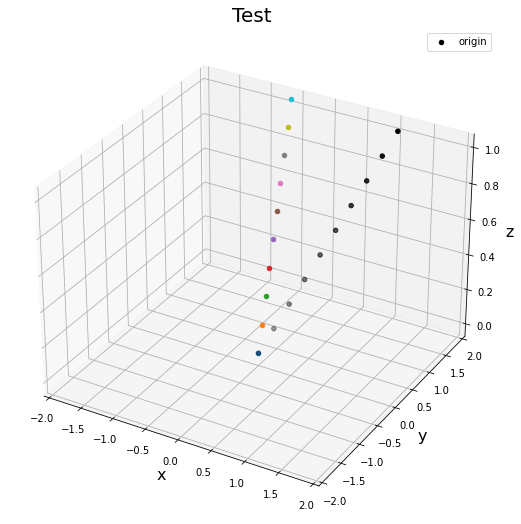

In [4]:
rot_x_mat = rot_z(np.deg2rad(45))
x= np.linspace(start=0,stop=1, num=10)
y= np.linspace(start=0, stop=2, num=10)
z= np.linspace(start=0, stop=1, num=10)

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
for x_point, y_point, z_point in zip(x,y,z):
    xyz_point = np.array([x_point, y_point, z_point])
    new_xyz_point = rot_x_mat@xyz_point
    print(new_xyz_point[0], new_xyz_point[1], new_xyz_point[2])
    ax.scatter(new_xyz_point[0], new_xyz_point[1], new_xyz_point[2])
ax.scatter(x,y,z, color='k', label="origin")
plt.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y",fontsize=16)
ax.set_zlabel("z", fontsize=16)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
# ax.set_zlim()
# ax.view_init(0,0)
# ax.view_init(-45,0)

# ax.set_zlim(0,1)
plt.title("Test", fontsize=20)
plt.show()

In [10]:
rot_y_mat = Rotation_Y(np.deg2rad(45))
trans_mat = Translation(x=0, y=0.18, z=1.45)
homo_mat = HT_matrix(Rotation=rot_y_mat, Position=trans_mat)
homo_inv_mat = np.linalg.inv(homo_mat)

orthograph_mat_trans =  Translation(x=0, y=0.6, z=1.55)
orthograph_mat_rot_y_mat = Rotation_Y(np.deg2rad(90))
orthograph_homo_mat = HT_matrix(Rotation=orthograph_mat_rot_y_mat, 
                                Position=orthograph_mat_trans)


/tmp/ipykernel_270732/3109396458.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


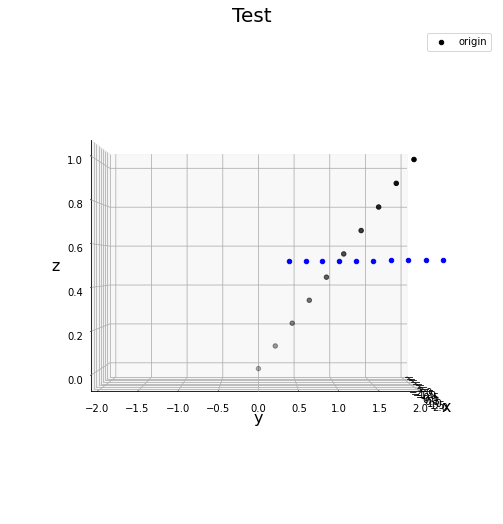

In [13]:
x= np.linspace(start=0,stop=1, num=10)
y= np.linspace(start=0, stop=2, num=10)
z= np.linspace(start=0, stop=1, num=10)

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
for x_point, y_point, z_point in zip(x,y,z):
    xyz_point = np.array([x_point, y_point, z_point, 1])
    new_xyz_point = orthograph_homo_mat@homo_inv_mat@xyz_point
    ax.scatter(new_xyz_point[0], new_xyz_point[1], new_xyz_point[2], color="b")
ax.scatter(x,y,z, color='k', label="origin")
plt.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y",fontsize=16)
ax.set_zlabel("z", fontsize=16)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
# ax.set_zlim()
ax.view_init(0,0)
# ax.view_init(-45,0)

# ax.set_zlim(0,1)
plt.title("Test", fontsize=20)
plt.show()


In [14]:
orthograph_mat_trans =  Translation(x=0, y=0.42, z=0.1)
orthograph_mat_rot_y_mat = Rotation_Y(np.deg2rad(45))
orthograph_homo_mat = HT_matrix(Rotation=orthograph_mat_rot_y_mat, 
                                Position=orthograph_mat_trans)

/tmp/ipykernel_270732/296256961.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


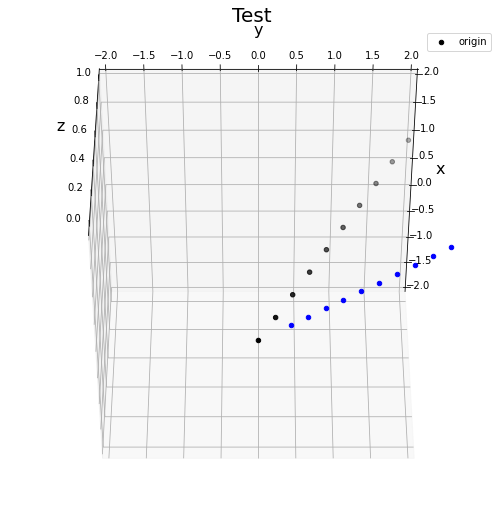

In [18]:
x= np.linspace(start=0,stop=1, num=10)
y= np.linspace(start=0, stop=2, num=10)
z= np.linspace(start=0, stop=1, num=10)

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
for x_point, y_point, z_point in zip(x,y,z):
    xyz_point = np.array([x_point, y_point, z_point, 1])
    new_xyz_point = orthograph_homo_mat@xyz_point
    ax.scatter(new_xyz_point[0], new_xyz_point[1], new_xyz_point[2], color="b")
ax.scatter(x,y,z, color='k', label="origin")
plt.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y",fontsize=16)
ax.set_zlabel("z", fontsize=16)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
# ax.set_zlim()
# ax.view_init(0,0)
ax.view_init(-45,0)

# ax.set_zlim(0,1)
plt.title("Test", fontsize=20)
plt.show()